In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
import folium
from folium import plugins
%matplotlib inline

In [2]:
water_tank = pd.read_csv('Self-Reported_Drinking_Water_Tank_Inspection_Results.csv')
features = ['BIN','BOROUGH','ZIP','STREET_NAME','BLOCK', 'LOT','REPORTING_YEAR','TANK_NUM','INSPECTION_DATE',
           'GI_RESULT_INTERNAL_STRUCTURE','GI_RESULT_EXTERNAL_STRUCTURE','GI_RESULT_OVERFLOW_PIPES','GI_RESULT_ACCESS_LADDERS',
            'GI_RESULT_AIR_VENTS','GI_RESULT_ROOF_ACCESS','SI_RESULT_SEDIMENT','SI_RESULT_BIOLOGICAL_GROWTH','SI_RESULT_DEBRIS_INSECTS',
            'SI_RESULT_RODENT_BIRD','MEET_STANDARDS','LATITUDE','LONGITUDE']
water_tank_df = water_tank[features]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37579 entries, 0 to 37578
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BIN                           37579 non-null  int64  
 1   BOROUGH                       37579 non-null  object 
 2   ZIP                           37579 non-null  int64  
 3   STREET_NAME                   37579 non-null  object 
 4   BLOCK                         37579 non-null  int64  
 5   LOT                           37579 non-null  int64  
 6   REPORTING_YEAR                37579 non-null  int64  
 7   TANK_NUM                      37579 non-null  int64  
 8   INSPECTION_DATE               37558 non-null  object 
 9   GI_RESULT_INTERNAL_STRUCTURE  37501 non-null  object 
 10  GI_RESULT_EXTERNAL_STRUCTURE  37524 non-null  object 
 11  GI_RESULT_OVERFLOW_PIPES      37524 non-null  object 
 12  GI_RESULT_ACCESS_LADDERS      37494 non-null  object 
 13  G

/Users/xinyuhuang/opt/anaconda3/envs/eods-f21/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


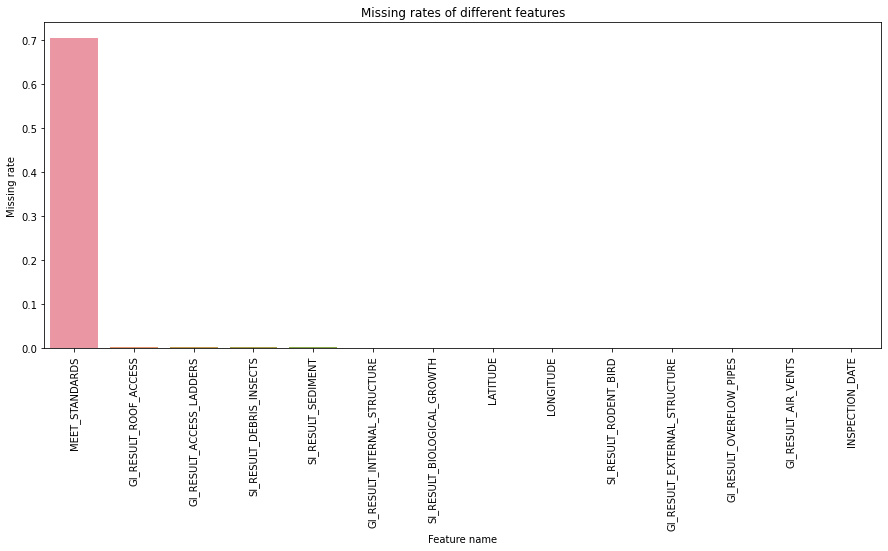

In [3]:
water_tank_df.info()
missing_rate = np.sum(water_tank_df.isna(),axis = 0).values/water_tank_df.shape[0]
feature_names = water_tank_df.columns.values
feat_missing = zip(feature_names, missing_rate)
feats, imps = zip(*(sorted(list(filter(lambda x:x[1]!= 0, feat_missing)),key = lambda x:x[1], reverse = True)))
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(list(feats),list(imps))
ax.tick_params(axis = 'x', rotation = 90)
ax.set_xlabel('Feature name')
ax.set_ylabel('Missing rate')
ax.set_title('Missing rates of different features')
plt.show()

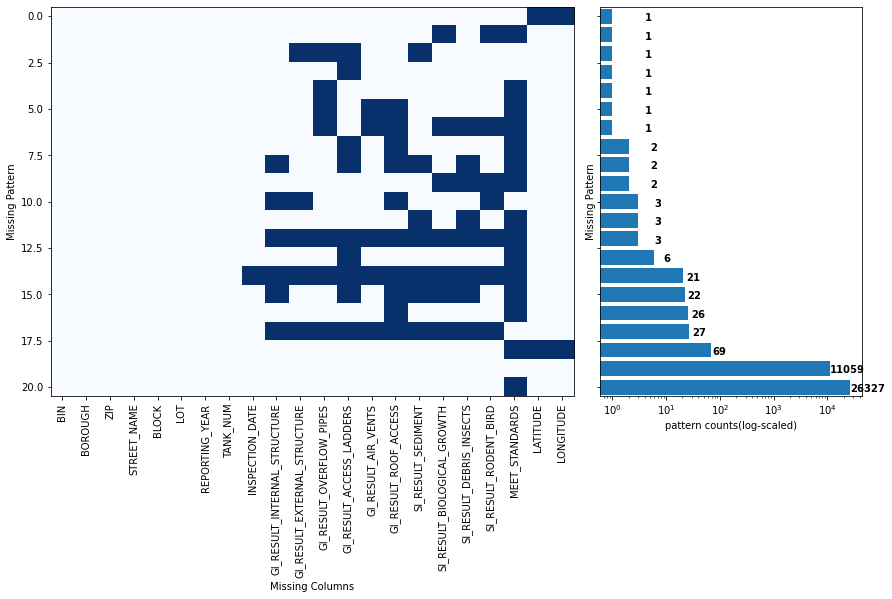

In [4]:
# missing value pattern
missing_patterns = water_tank_df.isna().groupby(list(water_tank_df.isna().columns),as_index=False).size()
missing_patterns = missing_patterns.sort_values(by='size').reset_index(drop=True)
fig, ax = plt.subplots(1,2, figsize=(12,6), gridspec_kw={'width_ratios': [2,1]}, sharey = True)
fig.tight_layout()

ax[0].imshow(missing_patterns.iloc[:,0:-1], aspect='auto', cmap = 'Blues')
ax[0].set_xlabel('Missing Columns')
ax[0].set_ylabel("Missing Pattern")
ax[0].set_xticks(ticks = np.arange(22))
ax[0].set_xticklabels(labels = missing_patterns.columns[0:-1], rotation = 90)

ax[1].barh(missing_patterns['size'].index, missing_patterns['size'])
ax[1].set_xscale('log')
for i, v in enumerate(missing_patterns['size']):
    ax[1].text(v + 3, i + .25, str(v), color='black', fontweight='bold')

ax[1].set_xlabel('pattern counts(log-scaled)')
ax[1].set_ylabel("Missing Pattern")
plt.savefig("Water_Tank_Missing_Pattern.png",bbox_inches='tight')

We can find that most columns do not contain missing values. And Only feature 'MEET_STANDARDS' have over 70% missing. The reason behind this could be that in most cases, we can not do all the tests need to get the conclusion. Since this variable is most important in our analysis, we can not just impute the missing values. 

In [5]:
water_tank_df_c = water_tank_df.dropna()
water_tank_df.columns.values

array(['BIN', 'BOROUGH', 'ZIP', 'STREET_NAME', 'BLOCK', 'LOT',
       'REPORTING_YEAR', 'TANK_NUM', 'INSPECTION_DATE',
       'GI_RESULT_INTERNAL_STRUCTURE', 'GI_RESULT_EXTERNAL_STRUCTURE',
       'GI_RESULT_OVERFLOW_PIPES', 'GI_RESULT_ACCESS_LADDERS',
       'GI_RESULT_AIR_VENTS', 'GI_RESULT_ROOF_ACCESS',
       'SI_RESULT_SEDIMENT', 'SI_RESULT_BIOLOGICAL_GROWTH',
       'SI_RESULT_DEBRIS_INSECTS', 'SI_RESULT_RODENT_BIRD',
       'MEET_STANDARDS', 'LATITUDE', 'LONGITUDE'], dtype=object)

In [6]:
categorical_features = ['REPORTING_YEAR','BOROUGH', 'GI_RESULT_INTERNAL_STRUCTURE','GI_RESULT_EXTERNAL_STRUCTURE','GI_RESULT_OVERFLOW_PIPES','GI_RESULT_ACCESS_LADDERS',
            'GI_RESULT_AIR_VENTS','GI_RESULT_ROOF_ACCESS','SI_RESULT_SEDIMENT','SI_RESULT_BIOLOGICAL_GROWTH','SI_RESULT_DEBRIS_INSECTS',
            'SI_RESULT_RODENT_BIRD']
target = ['MEET_STANDARDS']
feat = categorical_features.copy()


Since We only have categorical features, we draw bar plot of each variable below. 

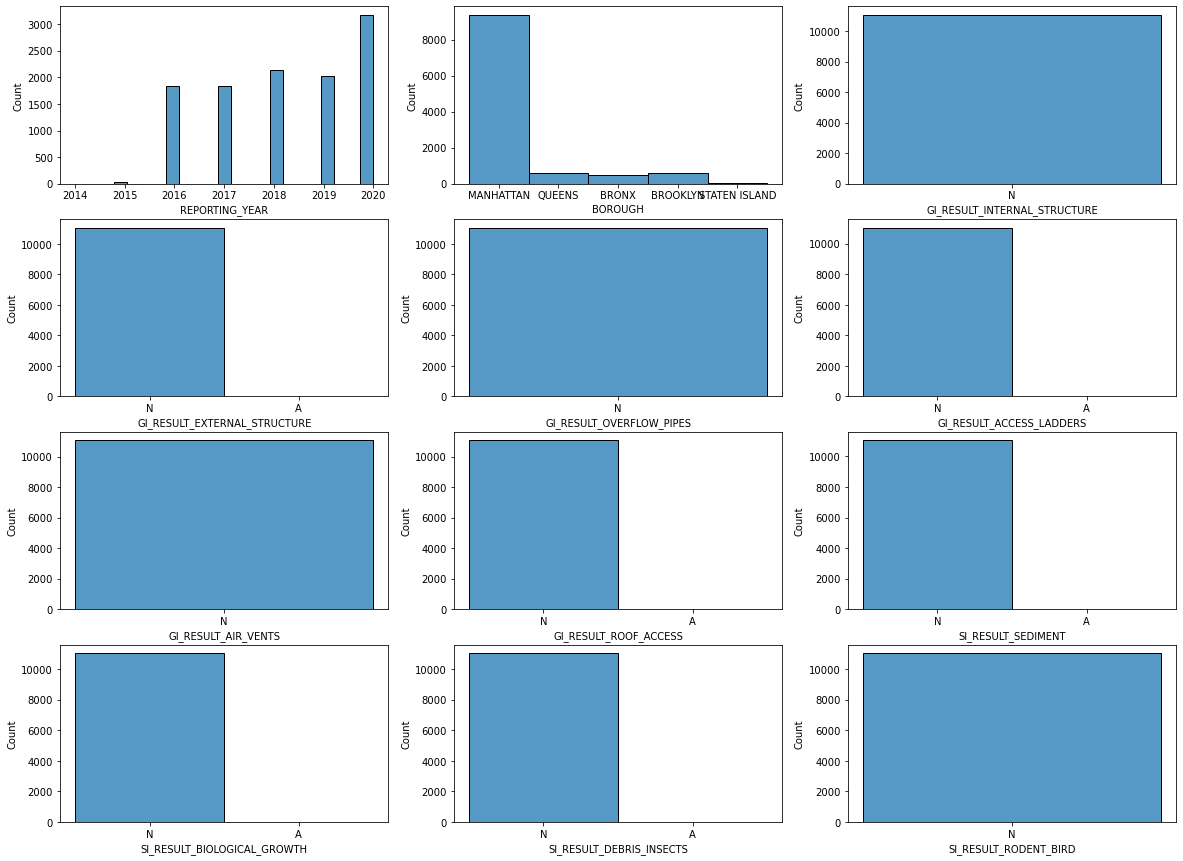

In [13]:
# code here
fig, ax = plt.subplots(4,3,figsize=(20,15))
feature_list = categorical_features
ax = ax.flatten()
for feature, subax in zip(feature_list, ax):
    sns.histplot(x = feature, data = water_tank_df_c, ax=subax)
plt.savefig("Water_Tank_Barplots.png",bbox_inches='tight')

From the last barplots, we can see that most inspections happened in 2021. Geologically, Manhanttan have most inspections among all boroughs in New York City. Other variables are different test results for water tanks. It seems that almost all can past the tests.

<AxesSubplot:xlabel='MEET_STANDARDS', ylabel='Count'>

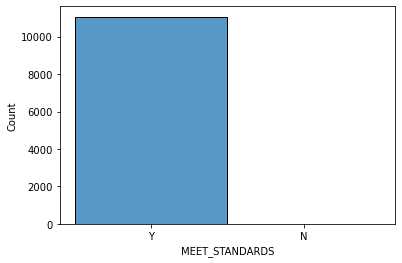

In [8]:
sns.histplot(x = 'MEET_STANDARDS', data = water_tank_df_c)

We also draw a barplot of the target variable. It seems that most water tanks are in good state.

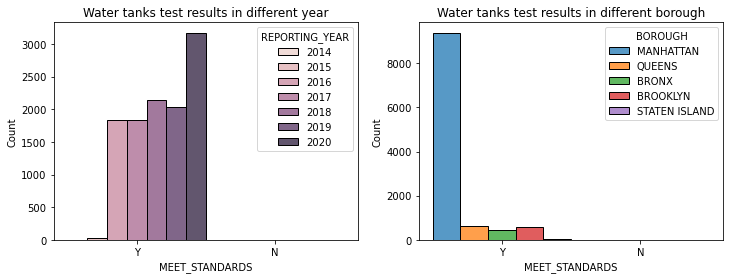

In [15]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(x = 'MEET_STANDARDS', hue = 'REPORTING_YEAR',data = water_tank_df_c,multiple = 'dodge', ax = ax[0])
sns.histplot(x = 'MEET_STANDARDS', hue = 'BOROUGH',data = water_tank_df_c,multiple = 'dodge', ax = ax[1])
ax[0].set_title('Water tanks test results in different year')
ax[1].set_title('Water tanks test results in different borough')
plt.savefig("Water_Tank_results.png",bbox_inches='tight')

To furtherly investigate how data is distributed geologically and chronological, we draw the above two bar plots. The results do not differ much from the former plots.

In [12]:
df_2020 = water_tank_df_c[water_tank_df_c.REPORTING_YEAR == 2020]
df_2020 = df_2020[df_2020.MEET_STANDARDS == 'Y']
inspection_station_locations = df_2020[["LATITUDE", "LONGITUDE"]].sample(1)
map = folium.Map(location=[inspection_station_locations.LATITUDE.mean(), 
                           inspection_station_locations.LONGITUDE.mean()], 
                           zoom_start=14, 
                           control_scale=True)

plugins.HeatMap(list(zip(df_2020["LATITUDE"], df_2020["LONGITUDE"])), radius=8, min_opacity=1).add_to(map)
map


We also draw a headmap to show the working water tanks inspected in 2020. 